 # *Intelligence Artificielle et Jeux - ECM2A*

# Partie II : Exploration avec adversaire

## Présentation de l'environnement

### Dans cette seconde partie vous  vous intéresserez aux répertoires et fichiers suivants  

*  Games : 
 * Games.py : définition générique de la classe Jeu et de la fonciton qui éxecute une partie. 
 * Players.py : Exemples de joueurs, notamment le joueur Random qui joue un coup au hasard parmi les coups légaux

* Chess : Tout le code concernant les échecs
 * ChessGame.py : Redéfinition des méthodes de la classe Game en utilisant le package python-chess
 * Feval_Chess.py : fonction simple d'évaluation utilisée en fin d'exploration

* Awale : Tout le code concernant le jeu d'Awalé
 * AwaleGame.py : Redéfinition des méthodes de la classe Game
 * Feval_Awale.py : fonction simple d'évaluation utilisée en fin d'exploration
 

#### Vous aurez peut-être à vous intéresser à des fonctions utiles de gestion de listes FIFO ou LIFO dans le répertoire UTILE mais n'y allez voir que si nécessaire
 


## Utilisation de l'environnement et de la classe ChessGame

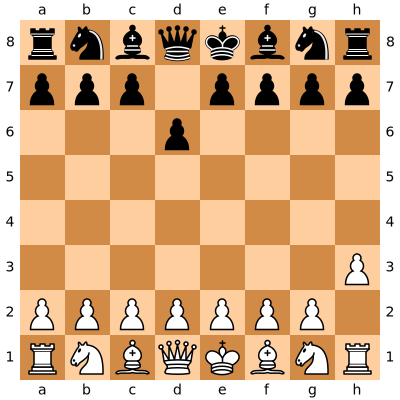

In [5]:
import sys

from Games.Games import Game, play_game

from Chess.ChessGame import ChessGame
from Chess.Feval_Chess import feval1

from Games.Players import RandomPlayer

j = ChessGame()
a = play_game(j, RandomPlayer(), RandomPlayer() )



### Nb : Come vous le voyez ici la partie est limitée à deux coups. 
### SI vous voulez jouer des parties jusqu'au bout il faut enlever cette limite dans la fonction *play_game*

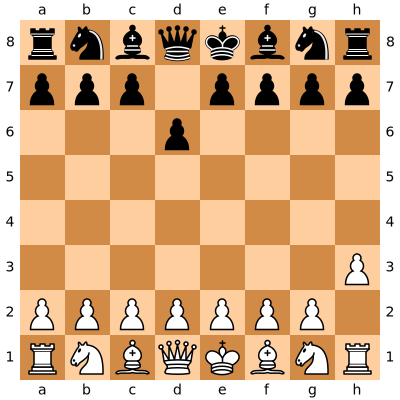

In [6]:
# Il est possible de rejouer la partie avec:

j.rejoue()


In [3]:
print j.board.legal_moves

<LegalMoveGenerator at 0x7f65c9b9ffd0 (Nh3, Nf3, Ba3, Bb2, Nc3, Na3, b5, h3, g3, f3, e3, d3, c3, a3, h4, g4, f4, e4, d4, c4, a4)>


#### Référez vous à la classe ChessGame pour plus d'informations

## Utilisation de l'environnement et de la classe AwaleGame

L'awale étant un jeu plus simple, la mise au point de vos algorithmes peut être plus aisée sur ce jeu.



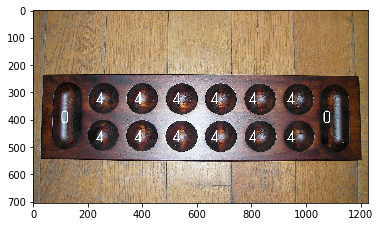

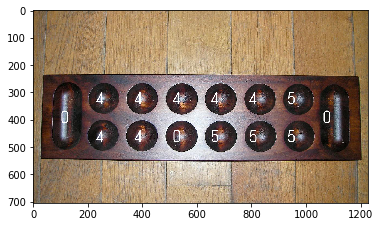

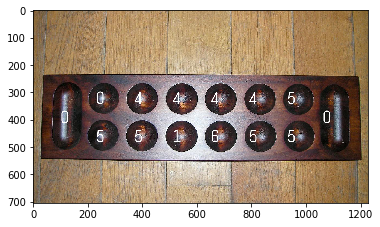

In [21]:

%matplotlib inline
from matplotlib.pyplot import imshow 
import numpy as np
from PIL import Image


from Games import Game, play_game

from Awale import AwaleGame
from Awale import feval1

from Games import RandomPlayer

j = AwaleGame()
a = play_game(j, RandomPlayer(), RandomPlayer() )


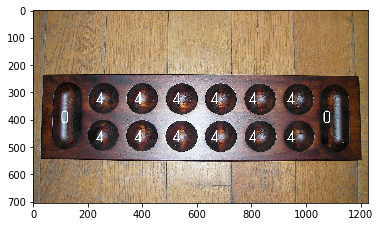

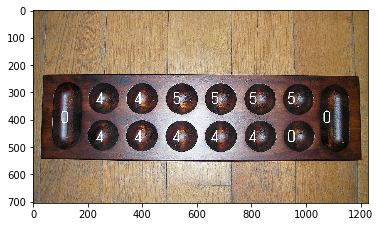

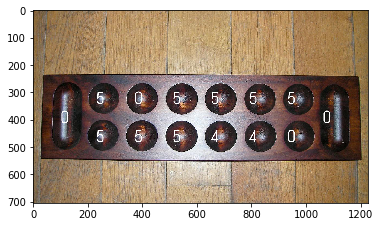

In [5]:
# Possiblité de rejouer la partie 

j.rejoue()


### Quelques commandes de base

Se réferer à la classe AwaleGame pour plus de détails.

[0, 1, 2, 3, 4]


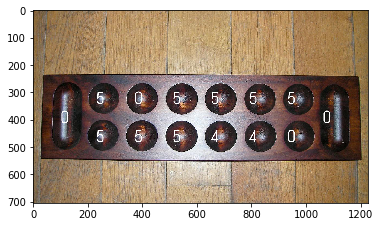

In [6]:
#j = AwaleGame()
j.display(j.board)
print j.actions(j.board)
    

##  Programmation de fonctions d'évaluation

* Ecrivez une fonction d'evaluation pour le jeu d'awele qui est egale à la différence de nombre de graines capturées par les deux joueurs

* Utilisez la fonction d'évaluation suivante pour le jeu d'echecs. Vous expliquerez ce qu'elle calcule. 



# _Reponse_

*****************************************************
- ###  ___Q1___

Fonction d'evaluation a utiliser pour le jeu d'awele

> ```python
def feval1_awele(game, state, depth):
    u = state.score[0] - state.score[1]   # SOUTH: 0;  NORTH: 1  
    return u
```
*****************************************************
- ### ___Q2___

Cette function d'evalution est pour calculer le valeur de l'echec;
>`len(state.pieces(tye_p, chess.WHITE))`Cette ligne est pour dooner le nombre de PAWN/KNIGHT/BISHOP/ROOK/QUEEN respectivement de la partie WHITE; 
<br>`game.Tab_Val_Pieces[type_p]` donne un valuer specific respectivement au des differentes types de pieces 
<br>`u = u+ 0.1* len([ e for e in state.legal_moves])` considere l'influence de strategie possible maintenant 

Ensemblement cette function nous donne une evaluation de valuer en considerant le nombre des pieces utiles et la strategie possible maintenant. 

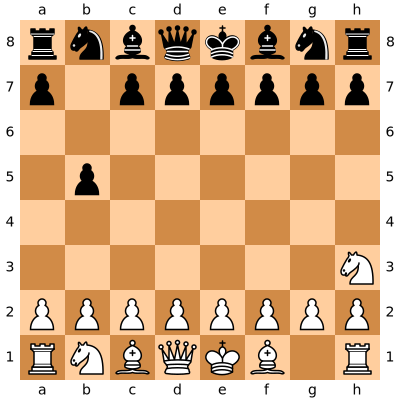

In [30]:
# __________________________________________TEST

import sys

from Games.Games import Game, play_game

from Chess.ChessGame import ChessGame
from Chess.Feval_Chess import feval1

from Games.Players import RandomPlayer

j = ChessGame()
a = play_game(j, RandomPlayer(), RandomPlayer() )


In [38]:
# __________________________________________TEST

foo = j.board
for type_p in [chess.PAWN,chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN]:
#         u += len(state.pieces(type_p, chess.WHITE))* game.Tab_Val_Pieces[type_p]
    print(len(foo.pieces(type_p, chess.WHITE))*j.Tab_Val_Pieces[type_p])
    print("********************")


8
********************
6
********************
6
********************
10
********************
10
********************


##  Programmation d'un joueur Minimax

* Ecrivez les codes nécessaires pour faire jouer un joueur Minimax avec les fonctions d'evaluation précédentes

=> La cellule suivante doit fonctionner lorsque vous aurez écrit votre code

* Calculez les statistiques de victoires en fonction de la profondeur du joueur (à l'awale) en faisant jouer votre joueur contre le joueur Random

* Calculez le nombre de noeuds explorés en fonction de la profondeur pour une situation initiale donnée (aux echecs)  

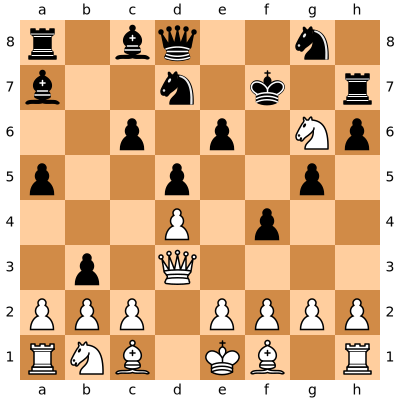

In [1]:
import sys
#sys.path.append("/Users/tartieres/Documents/OwnCloud/Enseignements/Cours 2017-2018/1A/JO IA/TP-Chess/Packaging/Games")
#sys.path.append("./Games:./Utile:./Chess:./Awale:./Players")

from Games import Game, play_game

from Chess import ChessGame
from Chess.Feval_Chess import feval1

from Games.Players import RandomPlayer
from Games.AlphaBetaPlayer import MiniMaxplayer

j = ChessGame()
a = play_game(j, MiniMaxplayer(depth=3, eval_fn=feval1), RandomPlayer() )

# j.rejoue()

0
fin de partie
58


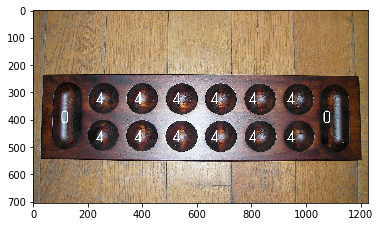

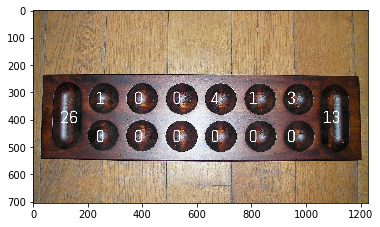

In [3]:

%matplotlib inline
from matplotlib.pyplot import imshow 
import numpy as np
from PIL import Image


from Games import Game, play_game

from Awale import AwaleGame
from Awale import feval1
from Games.AlphaBetaPlayer import MiniMaxplayer

from Games import RandomPlayer

# j = AwaleGame()
# a = play_game(j, MiniMaxplayer(depth=3, eval_fn=feval1), RandomPlayer() )
foo = []
for i in range(1 ,6):
    buf = 0
    for k in range(0, 10):
        j = AwaleGame()
        a = play_game(j, MiniMaxplayer(depth=1, eval_fn=feval1), RandomPlayer() )
        buf += a[0]
    foo.append(buf)

print(foo)

In [ ]:
from Games import Game, play_game

from Chess import ChessGame
from Chess.Feval_Chess import feval1

from Games.Players import RandomPlayer
from Games.AlphaBetaPlayer import MiniMaxplayer

j = ChessGame()
a = play_game(j, MiniMaxplayer(depth=3, eval_fn=feval1), RandomPlayer() )